In [1]:
import numpy as np
import cv2 as cv
import glob
import random
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

In [2]:
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

objp = np.zeros((6*7,3), np.float32)

objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('images/*.jpg')

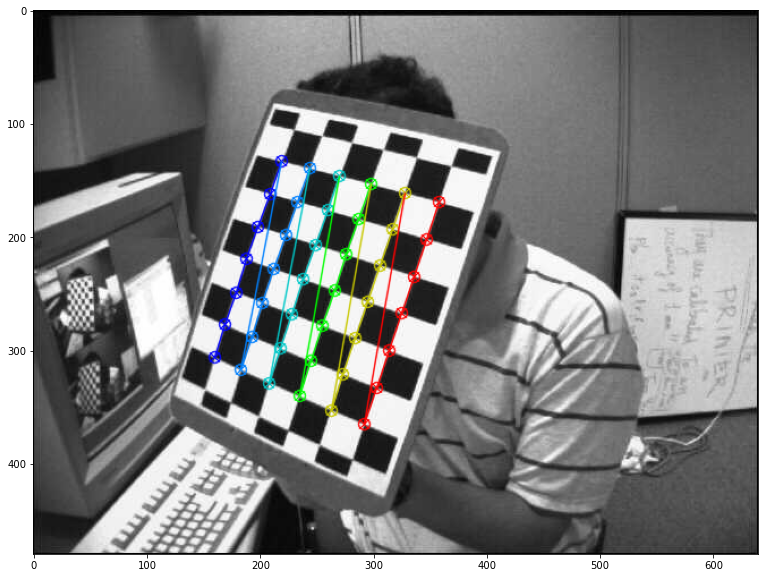

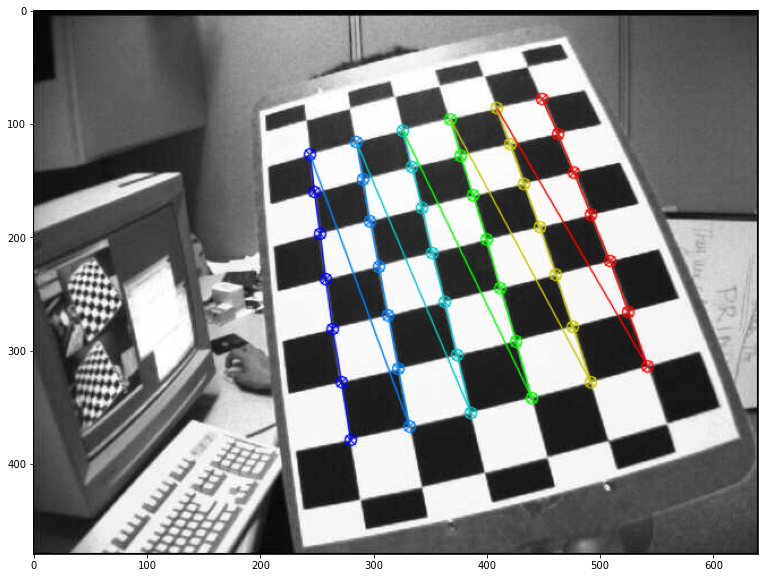

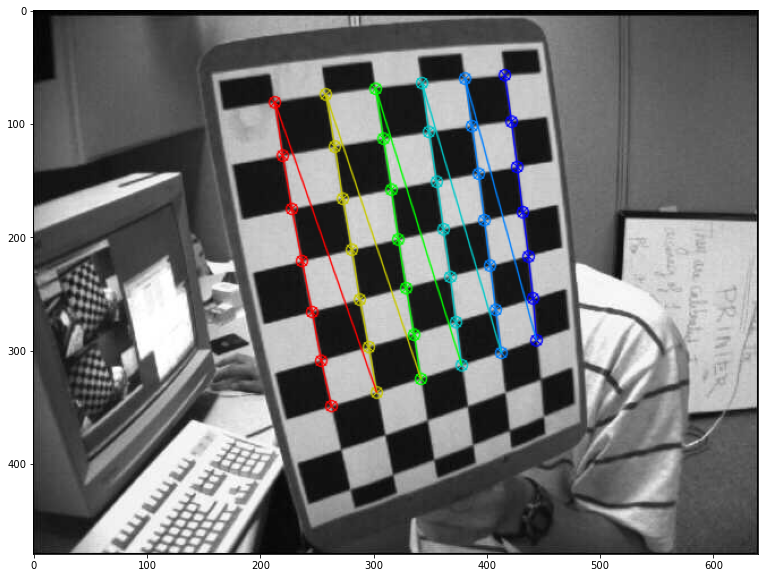

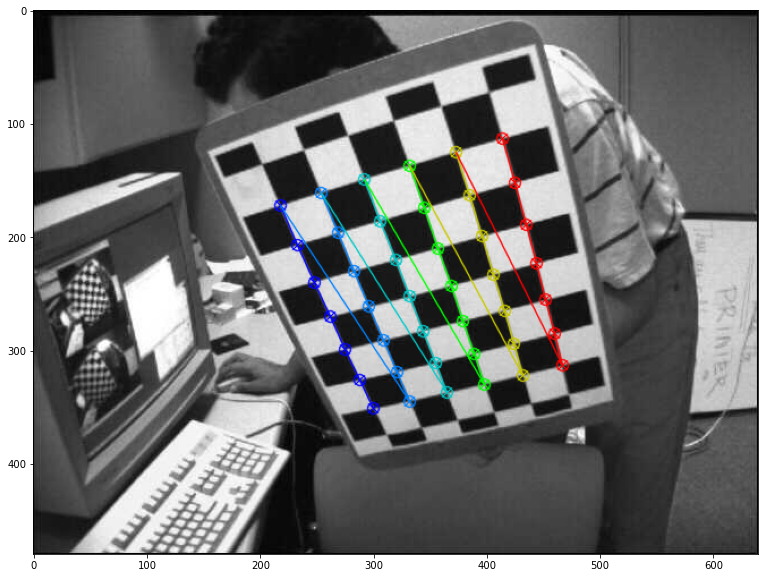

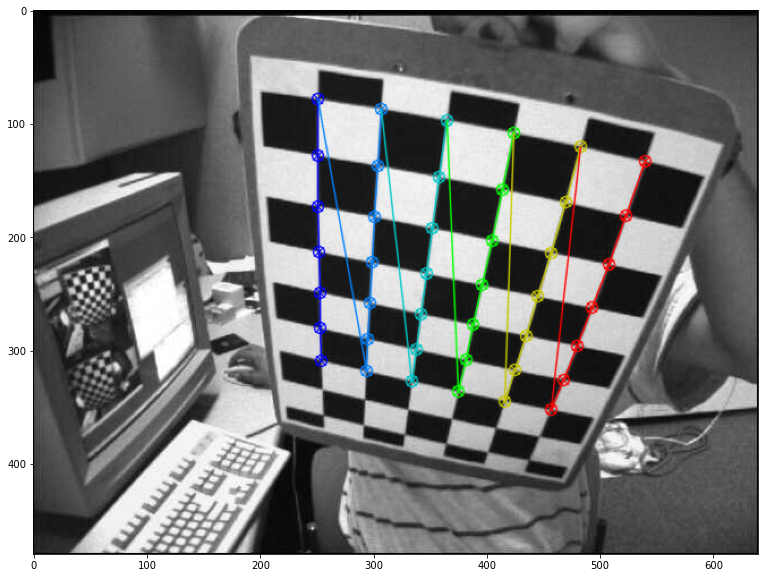

In [3]:
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (7,6), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
        
        # Draw and display the corners
        cv.drawChessboardCorners(img, (7,6), corners2, True)

        if(bool(random.getrandbits(1))):
            plt.imshow(img)
            plt.show()


## Calibrando

In [4]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

## Tirando a distorção

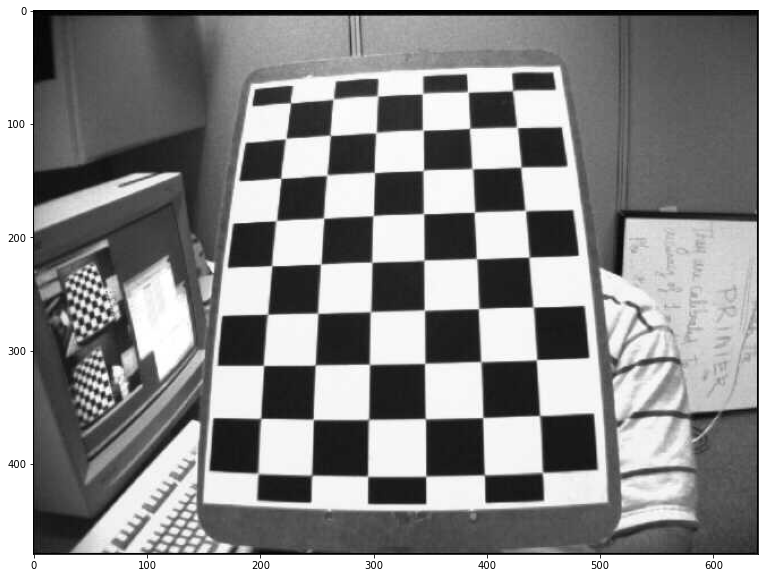

In [5]:
img = cv.imread('images/left12.jpg')
plt.imshow(img)
plt.show()

In [6]:
h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

In [7]:
# undistort
dst = cv.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]

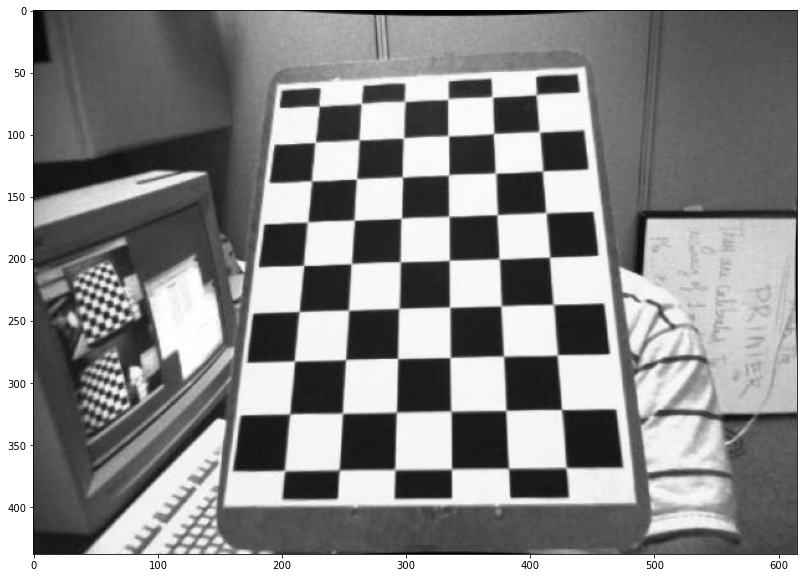

In [8]:
plt.imshow(dst)
plt.show()